# RBM Recommender system, training and example

In [1]:
from src.eval import evaluate_rbm, evaluate_dbn
from src.data_preprocessing import load_data, preprocess_data, load_movies
from src.rbm_model import RBM, DBN
from src.training import train_rbm, train_dbn
from src.plot_utils import plot_training_loss
from sklearn.model_selection import train_test_split
from src.utils import recommend, movie_from_tensor
import torch
import random
import copy

## TRAINING
First we intialize our dataset and parameters

In [2]:
file_path = "data\\ml-100k\\u.data"
data = load_data(file_path)
interaction_matrix = preprocess_data(data)


interaction_tensor = torch.tensor(interaction_matrix.values, dtype=torch.float32)
train_data, test_data = train_test_split(interaction_tensor.numpy(), test_size=0.2, random_state=42)

train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_visible = interaction_tensor.shape[1]
num_hidden = 200
num_hidden2 = 100

Next we train RBM on the given dataset.

Epoch 0/40: 100%|██████████| 24/24 [00:03<00:00,  7.20it/s, Loss=0.326]


Reconstruction Loss: 0.3898


Epoch 1/40: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s, Loss=0.279]


Reconstruction Loss: 0.3020


Epoch 2/40: 100%|██████████| 24/24 [00:03<00:00,  7.45it/s, Loss=0.26] 


Reconstruction Loss: 0.2714


Epoch 3/40: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s, Loss=0.238]


Reconstruction Loss: 0.2525


Epoch 4/40: 100%|██████████| 24/24 [00:03<00:00,  7.33it/s, Loss=0.234]


Reconstruction Loss: 0.2398


Epoch 5/40: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s, Loss=0.234]


Reconstruction Loss: 0.2296


Epoch 6/40: 100%|██████████| 24/24 [00:03<00:00,  7.47it/s, Loss=0.212]


Reconstruction Loss: 0.2204


Epoch 7/40: 100%|██████████| 24/24 [00:03<00:00,  7.46it/s, Loss=0.23] 


Reconstruction Loss: 0.2148


Epoch 8/40: 100%|██████████| 24/24 [00:03<00:00,  7.20it/s, Loss=0.19] 


Reconstruction Loss: 0.2070


Epoch 9/40: 100%|██████████| 24/24 [00:03<00:00,  7.57it/s, Loss=0.193]


Reconstruction Loss: 0.2029


Epoch 10/40: 100%|██████████| 24/24 [00:03<00:00,  7.57it/s, Loss=0.198]


Reconstruction Loss: 0.1976


Epoch 11/40: 100%|██████████| 24/24 [00:03<00:00,  7.32it/s, Loss=0.179]


Reconstruction Loss: 0.1916


Epoch 12/40: 100%|██████████| 24/24 [00:03<00:00,  7.48it/s, Loss=0.181]


Reconstruction Loss: 0.1870


Epoch 13/40: 100%|██████████| 24/24 [00:03<00:00,  7.14it/s, Loss=0.174]


Reconstruction Loss: 0.1825


Epoch 14/40: 100%|██████████| 24/24 [00:03<00:00,  7.27it/s, Loss=0.164]


Reconstruction Loss: 0.1782


Epoch 15/40: 100%|██████████| 24/24 [00:03<00:00,  7.80it/s, Loss=0.204]


Reconstruction Loss: 0.1754


Epoch 16/40: 100%|██████████| 24/24 [00:03<00:00,  7.36it/s, Loss=0.175]


Reconstruction Loss: 0.1700


Epoch 17/40: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s, Loss=0.164]


Reconstruction Loss: 0.1670


Epoch 18/40: 100%|██████████| 24/24 [00:03<00:00,  7.46it/s, Loss=0.173]


Reconstruction Loss: 0.1638


Epoch 19/40: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s, Loss=0.18] 


Reconstruction Loss: 0.1589


Epoch 20/40: 100%|██████████| 24/24 [00:03<00:00,  7.34it/s, Loss=0.143]


Reconstruction Loss: 0.1562


Epoch 21/40: 100%|██████████| 24/24 [00:03<00:00,  6.97it/s, Loss=0.176]


Reconstruction Loss: 0.1534


Epoch 22/40: 100%|██████████| 24/24 [00:03<00:00,  6.79it/s, Loss=0.169]


Reconstruction Loss: 0.1504


Epoch 23/40: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s, Loss=0.145]


Reconstruction Loss: 0.1476


Epoch 24/40: 100%|██████████| 24/24 [00:03<00:00,  7.21it/s, Loss=0.155]


Reconstruction Loss: 0.1454


Epoch 25/40: 100%|██████████| 24/24 [00:03<00:00,  7.27it/s, Loss=0.127]


Reconstruction Loss: 0.1425


Epoch 26/40: 100%|██████████| 24/24 [00:03<00:00,  7.12it/s, Loss=0.165]


Reconstruction Loss: 0.1401


Epoch 27/40: 100%|██████████| 24/24 [00:03<00:00,  7.22it/s, Loss=0.164]


Reconstruction Loss: 0.1388


Epoch 28/40: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s, Loss=0.151]


Reconstruction Loss: 0.1359


Epoch 29/40: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s, Loss=0.136]


Reconstruction Loss: 0.1338


Epoch 30/40: 100%|██████████| 24/24 [00:03<00:00,  7.57it/s, Loss=0.147]


Reconstruction Loss: 0.1317


Epoch 31/40: 100%|██████████| 24/24 [00:03<00:00,  7.31it/s, Loss=0.117]


Reconstruction Loss: 0.1291


Epoch 32/40: 100%|██████████| 24/24 [00:03<00:00,  7.33it/s, Loss=0.137] 


Reconstruction Loss: 0.1280


Epoch 33/40: 100%|██████████| 24/24 [00:03<00:00,  7.37it/s, Loss=0.143]


Reconstruction Loss: 0.1269


Epoch 34/40: 100%|██████████| 24/24 [00:03<00:00,  7.38it/s, Loss=0.146]


Reconstruction Loss: 0.1245


Epoch 35/40: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s, Loss=0.145]


Reconstruction Loss: 0.1227


Epoch 36/40: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s, Loss=0.117] 


Reconstruction Loss: 0.1208


Epoch 37/40: 100%|██████████| 24/24 [00:03<00:00,  7.25it/s, Loss=0.128] 


Reconstruction Loss: 0.1212


Epoch 38/40: 100%|██████████| 24/24 [00:03<00:00,  7.46it/s, Loss=0.112]


Reconstruction Loss: 0.1182


Epoch 39/40: 100%|██████████| 24/24 [00:03<00:00,  7.47it/s, Loss=0.118] 


Reconstruction Loss: 0.1178


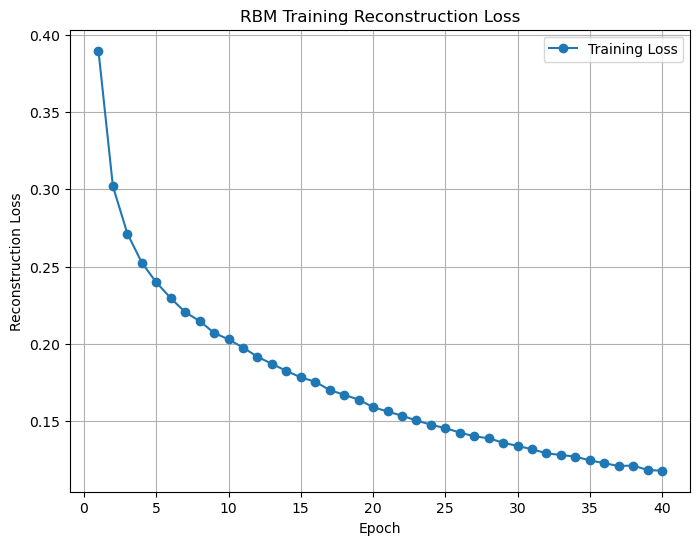

Validation loss: 0.11534831935549697
Validation accuracy: 88.46516807277806%


In [9]:
rbm = RBM(num_visible=num_visible, num_hidden=num_hidden, device=device)

losses = train_rbm(rbm, train_data, epochs=40, learning_rate=0.01, k=10, batch_size=32)

plot_training_loss(losses, title="RBM Training Reconstruction Loss", xlabel="Epoch", ylabel="Reconstruction Loss")
loss, acc = evaluate_rbm(rbm, test_data, device)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {acc*100}%")

Furthermore, we train DBN on the same dataset. The goal is to compare them.

Epoch 0/50: 100%|██████████| 24/24 [00:00<00:00, 62.01it/s, Loss=0.394]


Reconstruction Loss: 0.4600


Epoch 1/50: 100%|██████████| 24/24 [00:00<00:00, 74.80it/s, Loss=0.356]


Reconstruction Loss: 0.3700


Epoch 2/50: 100%|██████████| 24/24 [00:00<00:00, 76.81it/s, Loss=0.318]


Reconstruction Loss: 0.3378


Epoch 3/50: 100%|██████████| 24/24 [00:00<00:00, 72.65it/s, Loss=0.311]


Reconstruction Loss: 0.3209


Epoch 4/50: 100%|██████████| 24/24 [00:00<00:00, 78.06it/s, Loss=0.291]


Reconstruction Loss: 0.3050


Epoch 5/50: 100%|██████████| 24/24 [00:00<00:00, 79.73it/s, Loss=0.271]


Reconstruction Loss: 0.2954


Epoch 6/50: 100%|██████████| 24/24 [00:00<00:00, 79.97it/s, Loss=0.303]


Reconstruction Loss: 0.2887


Epoch 7/50: 100%|██████████| 24/24 [00:00<00:00, 74.78it/s, Loss=0.245]


Reconstruction Loss: 0.2800


Epoch 8/50: 100%|██████████| 24/24 [00:00<00:00, 80.22it/s, Loss=0.272]


Reconstruction Loss: 0.2742


Epoch 9/50: 100%|██████████| 24/24 [00:00<00:00, 77.03it/s, Loss=0.285]


Reconstruction Loss: 0.2703


Epoch 10/50: 100%|██████████| 24/24 [00:00<00:00, 75.01it/s, Loss=0.287]


Reconstruction Loss: 0.2645


Epoch 11/50: 100%|██████████| 24/24 [00:00<00:00, 77.81it/s, Loss=0.238]


Reconstruction Loss: 0.2618


Epoch 12/50: 100%|██████████| 24/24 [00:00<00:00, 71.40it/s, Loss=0.266]


Reconstruction Loss: 0.2571


Epoch 13/50: 100%|██████████| 24/24 [00:00<00:00, 75.57it/s, Loss=0.286]


Reconstruction Loss: 0.2535


Epoch 14/50: 100%|██████████| 24/24 [00:00<00:00, 73.81it/s, Loss=0.261]


Reconstruction Loss: 0.2508


Epoch 15/50: 100%|██████████| 24/24 [00:00<00:00, 76.73it/s, Loss=0.241]


Reconstruction Loss: 0.2465


Epoch 16/50: 100%|██████████| 24/24 [00:00<00:00, 77.20it/s, Loss=0.252]


Reconstruction Loss: 0.2445


Epoch 17/50: 100%|██████████| 24/24 [00:00<00:00, 75.77it/s, Loss=0.226]


Reconstruction Loss: 0.2426


Epoch 18/50: 100%|██████████| 24/24 [00:00<00:00, 75.21it/s, Loss=0.185]


Reconstruction Loss: 0.2394


Epoch 19/50: 100%|██████████| 24/24 [00:00<00:00, 75.23it/s, Loss=0.236]


Reconstruction Loss: 0.2366


Epoch 20/50: 100%|██████████| 24/24 [00:00<00:00, 74.75it/s, Loss=0.202]


Reconstruction Loss: 0.2337


Epoch 21/50: 100%|██████████| 24/24 [00:00<00:00, 73.57it/s, Loss=0.203]


Reconstruction Loss: 0.2345


Epoch 22/50: 100%|██████████| 24/24 [00:00<00:00, 74.85it/s, Loss=0.253]


Reconstruction Loss: 0.2332


Epoch 23/50: 100%|██████████| 24/24 [00:00<00:00, 76.03it/s, Loss=0.282]


Reconstruction Loss: 0.2326


Epoch 24/50: 100%|██████████| 24/24 [00:00<00:00, 69.36it/s, Loss=0.212]


Reconstruction Loss: 0.2293


Epoch 25/50: 100%|██████████| 24/24 [00:00<00:00, 73.92it/s, Loss=0.23] 


Reconstruction Loss: 0.2309


Epoch 26/50: 100%|██████████| 24/24 [00:00<00:00, 71.55it/s, Loss=0.218]


Reconstruction Loss: 0.2285


Epoch 27/50: 100%|██████████| 24/24 [00:00<00:00, 75.56it/s, Loss=0.186]


Reconstruction Loss: 0.2240


Epoch 28/50: 100%|██████████| 24/24 [00:00<00:00, 72.96it/s, Loss=0.231]


Reconstruction Loss: 0.2260


Epoch 29/50: 100%|██████████| 24/24 [00:00<00:00, 76.55it/s, Loss=0.202]


Reconstruction Loss: 0.2240


Epoch 30/50: 100%|██████████| 24/24 [00:00<00:00, 74.07it/s, Loss=0.222]


Reconstruction Loss: 0.2215


Epoch 31/50: 100%|██████████| 24/24 [00:00<00:00, 71.99it/s, Loss=0.232]


Reconstruction Loss: 0.2213


Epoch 32/50: 100%|██████████| 24/24 [00:00<00:00, 74.47it/s, Loss=0.229]


Reconstruction Loss: 0.2211


Epoch 33/50: 100%|██████████| 24/24 [00:00<00:00, 73.71it/s, Loss=0.245]


Reconstruction Loss: 0.2237


Epoch 34/50: 100%|██████████| 24/24 [00:00<00:00, 74.60it/s, Loss=0.243]


Reconstruction Loss: 0.2212


Epoch 35/50: 100%|██████████| 24/24 [00:00<00:00, 73.79it/s, Loss=0.213]


Reconstruction Loss: 0.2197


Epoch 36/50: 100%|██████████| 24/24 [00:00<00:00, 74.55it/s, Loss=0.244]


Reconstruction Loss: 0.2204


Epoch 37/50: 100%|██████████| 24/24 [00:00<00:00, 72.54it/s, Loss=0.216]


Reconstruction Loss: 0.2205


Epoch 38/50: 100%|██████████| 24/24 [00:00<00:00, 72.79it/s, Loss=0.241]


Reconstruction Loss: 0.2211


Epoch 39/50: 100%|██████████| 24/24 [00:00<00:00, 75.40it/s, Loss=0.219]


Reconstruction Loss: 0.2216


Epoch 40/50: 100%|██████████| 24/24 [00:00<00:00, 72.23it/s, Loss=0.192]


Reconstruction Loss: 0.2211


Epoch 41/50: 100%|██████████| 24/24 [00:00<00:00, 75.54it/s, Loss=0.162]


Reconstruction Loss: 0.2177


Epoch 42/50: 100%|██████████| 24/24 [00:00<00:00, 73.48it/s, Loss=0.24] 


Reconstruction Loss: 0.2227


Epoch 43/50: 100%|██████████| 24/24 [00:00<00:00, 72.73it/s, Loss=0.218]


Reconstruction Loss: 0.2210


Epoch 44/50: 100%|██████████| 24/24 [00:00<00:00, 75.51it/s, Loss=0.218]


Reconstruction Loss: 0.2203


Epoch 45/50: 100%|██████████| 24/24 [00:00<00:00, 73.69it/s, Loss=0.212]


Reconstruction Loss: 0.2188


Epoch 46/50: 100%|██████████| 24/24 [00:00<00:00, 74.50it/s, Loss=0.184]


Reconstruction Loss: 0.2190


Epoch 47/50: 100%|██████████| 24/24 [00:00<00:00, 72.01it/s, Loss=0.288]


Reconstruction Loss: 0.2213


Epoch 48/50: 100%|██████████| 24/24 [00:00<00:00, 75.33it/s, Loss=0.268]


Reconstruction Loss: 0.2226


Epoch 49/50: 100%|██████████| 24/24 [00:00<00:00, 74.72it/s, Loss=0.269]


Reconstruction Loss: 0.2208


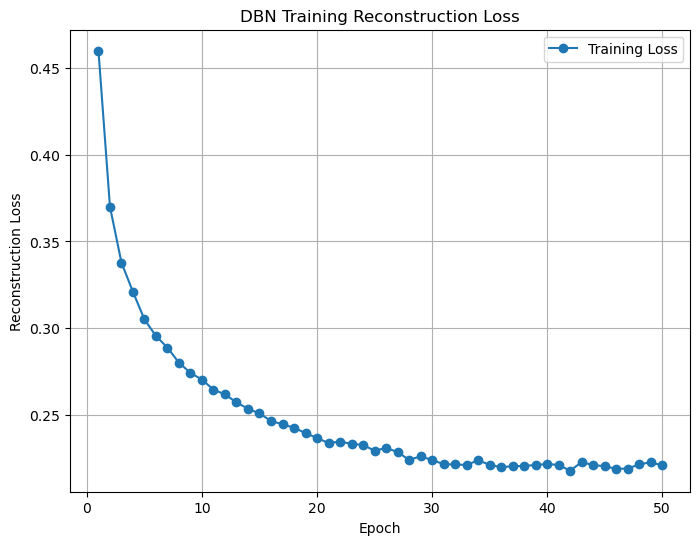

Validation loss: 0.0906
Validation accuracy: 90.94%


In [10]:
rbm_for_dbn = copy.deepcopy(rbm)
dbn = DBN(rbm_for_dbn, num_hidden2, device=device)

losses = train_dbn(dbn, train_data, epochs=50, learning_rate=0.01, batch_size=32)

plot_training_loss(losses, title="DBN Training Reconstruction Loss", xlabel="Epoch", ylabel="Reconstruction Loss")

loss, acc = evaluate_dbn(dbn, test_data, device)
print(f"Validation loss: {loss:.4f}")
print(f"Validation accuracy: {acc*100:.2f}%")

## USAGE EXAMPLE
First, load the movies dataframe

In [11]:
movies = load_movies("data\\ml-100k\\u.item")

Now, we pick a random user and print movies they liked (rate >=3 means they liked the movie).

In [12]:
random_user = random.randint(1, len(test_data))
liked = test_data[random_user]
movie_from_tensor(liked, movies)

'Mr. Holland's Opus (1995)' has the following genre:
['Drama']
--------------------------------------------------
'Bad Boys (1995)' has the following genre:
['Action']
--------------------------------------------------
'Net, The (1995)' has the following genre:
['Sci-Fi', 'Thriller']
--------------------------------------------------
'Twister (1996)' has the following genre:
['Action', 'Adventure', 'Thriller']
--------------------------------------------------
'Independence Day (ID4) (1996)' has the following genre:
['Action', 'Sci-Fi', 'War']
--------------------------------------------------
'Gone with the Wind (1939)' has the following genre:
['Drama', 'Romance', 'War']
--------------------------------------------------
'Sound of Music, The (1965)' has the following genre:
['Musical']
--------------------------------------------------
'Empire Strikes Back, The (1980)' has the following genre:
['Action', 'Adventure', 'Drama', 'Romance', 'Sci-Fi', 'War']
------------------------------

Now, the idea is to reconstruct the users watched list, and keep the probabilities from reconstruction. We pick the largest n=5 probabilities of movies the user has not watched as recommendation.

First we use RBM.

In [16]:
_,h = rbm.forward(liked)
probs, v = rbm.backward(h)
to_recommend = recommend(liked, probs, 5)
movie_from_tensor(to_recommend.cpu(), movies)

'Star Wars (1977)' has the following genre:
['Action', 'Adventure', 'Romance', 'Sci-Fi', 'War']
--------------------------------------------------
'Contact (1997)' has the following genre:
['Drama', 'Sci-Fi']
--------------------------------------------------
'Secrets & Lies (1996)' has the following genre:
['Drama']
--------------------------------------------------
'Titanic (1997)' has the following genre:
['Action', 'Drama', 'Romance']
--------------------------------------------------
'Singin' in the Rain (1952)' has the following genre:
['Musical', 'Romance']
--------------------------------------------------


Then we use DBN.

In [15]:
h_prob1_up, h_sample1_up, h_prob2_up, h_sample2_up = dbn.forward(liked)
h_sample2_down = h_sample2_up.clone()
for _ in range(1):
    h_prob1_down, h_sample1_down = dbn.rbm2.backward(h_sample2_down)
    h_prob2_down, h_sample2_down = dbn.rbm2.forward(h_sample1_down)

probs, v = dbn.rbm1.backward(h_sample1_down)
to_recommend = recommend(liked, probs, 5)
movie_from_tensor(to_recommend.cpu(), movies)

'Star Wars (1977)' has the following genre:
['Action', 'Adventure', 'Romance', 'Sci-Fi', 'War']
--------------------------------------------------
'Leaving Las Vegas (1995)' has the following genre:
['Drama', 'Romance']
--------------------------------------------------
'Air Force One (1997)' has the following genre:
['Action', 'Thriller']
--------------------------------------------------
'Fly Away Home (1996)' has the following genre:
['Adventure', "Children's"]
--------------------------------------------------
'Titanic (1997)' has the following genre:
['Action', 'Drama', 'Romance']
--------------------------------------------------


We see RBM and DBN both recommend Star wars and Titanic.